# Qualitative results

### Imports

In [1]:
import pandas as pd
import numpy as np
from glob import glob
from IPython.display import HTML, display, Markdown
import seaborn as sns
import matplotlib.pyplot as plt
# from data_mani.visu import *
from prediction.functions import aggregate_prediction_results, gen_strat_positions_and_ret_from_pred, sharpe_ratio_tb, plot_cum_ret
from time import time
init = time()

plt.style.use('bmh')

### Variables

In [2]:
models = ['logit', 'ridge', 'lasso', 'enet', 'random_forest', 'lgb', 'nn3']
models2 = ['LOGIT', 'RIDGE', 'LASSO', 'ENET', 'RF', 'GB', 'NN3']
fs_methods = ['all', 'sfi', 'mdi', 'mda', 'granger', 'huang', 'IAMB', 'MMMB']
fs_methods2 = ['ALL', 'SFI', 'MDI', 'MDA', 'GRANGER', 'HUANG', 'IAMB', 'MMMB']
tickers = ['SPX Index', 'CCMP Index','RTY Index', 'SPX Basic Materials',
           'SPX Communications', 'SPX Consumer Cyclical',
           'SPX Consumer Non cyclical', 'SPX Energy', 'SPX Financial',
           'SPX Industrial', 'SPX Technology', 'SPX Utilities']
benchmark_name = 'return_direction'
metric = "auc"
oos_start_date = '2012-07-03'
oos_end_date = '2020-12-31'

# Main reference

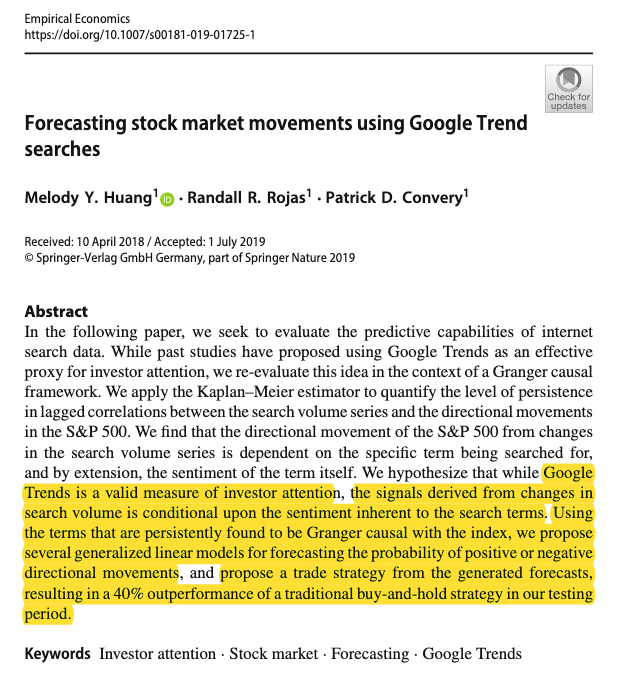

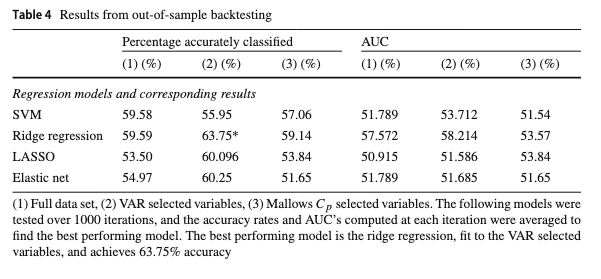

# Our models


## Feature Selection

> 1. All

> 2. Mean decrease impurity (random forest based) - MDI

> 3. Mean decrease accuracy (oos loss of performance; class based) - MDA

> 4. Single feature importance (oos individual feature; reg based) - SFI

> 5. Grenger causality - GRANGER

> 6. Granger causality + Logit - HUANG

> 7. Incremental association Markov boundary - IAMB

> 8. Max-Min Markov boundary - MMMB


## Prediction Models

> 1. Logit

> 2. Ridge regression

> 3. Lasso regression

> 4. Elastic net regression

> 5. Random Forest

> 6. Gradient Boosting

> 7. LSTM neural network (three layer)

## Prediction Setup

> 0. Sample from '2004-01-01' to '2020-12-31'

> 1. Feature selection: '2004-01-01' to '2012-07-03'

> 2. Forecasting: '2012-07-04' to '2020-12-31'

>> a. Random Search

>> b. Predict next year

>> c. Increase sample

# Aggregate prediction results

In [3]:
benchmarks = glob('data/indices/*.csv')
bench_list = []
for b in benchmarks:
    ticker = b.replace('data/indices/', '').replace('.csv', '')
    bench_ret_df = pd.read_csv(b)[3:]
    bench_ret_df.columns = ['date', 'return']
    bench_ret_df = bench_ret_df.melt('date')
    bench_ret_df['model'] = bench_ret_df['ticker'] = ticker
    bench_ret_df['fs'] = 'raw'

    bench_list.append(bench_ret_df)
benchmark_df = pd.concat(bench_list, axis=0)
benchmark_df['value'] = benchmark_df['value'].astype(float)

In [4]:
oos_melt_predictions_df, oos_melt_benchmark_df, oos_melt_auc_df = aggregate_prediction_results(prediction_models=models,
                                                                                               fs_models=fs_methods,
                                                                                               evaluation_start_date=oos_start_date,
                                                                                               evaluation_end_date=oos_end_date,
                                                                                               ticker_names=tickers,
                                                                                               metric_name=metric,
                                                                                               tag='oos',
                                                                                               benchmark_name=benchmark_name)

/Users/dcuoliveira/Documents/Daniel/causal_feature/src/prediction/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['model'] = benchmark_df['ticker']
/Users/dcuoliveira/Documents/Daniel/causal_feature/src/prediction/functions.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['fs'] = 'raw'


In [5]:
is_melt_predictions_df, is_melt_benchmark_df, is_melt_auc_df = aggregate_prediction_results(prediction_models=models,
                                                                                            fs_models=fs_methods,
                                                                                            evaluation_start_date='2005-01-03',
                                                                                            evaluation_end_date='2012-07-03',
                                                                                            ticker_names=tickers,
                                                                                            metric_name=metric,
                                                                                            tag='is',
                                                                                            benchmark_name=benchmark_name)

/Users/dcuoliveira/Documents/Daniel/causal_feature/src/prediction/functions.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['model'] = benchmark_df['ticker']
/Users/dcuoliveira/Documents/Daniel/causal_feature/src/prediction/functions.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['fs'] = 'raw'


## 1) AUC Analysis

### 1.1) In sample AUC median values

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,0.488,0.495,0.491,0.496,0.495,0.488,0.501
SFI,0.564,0.565,0.550,0.594,0.520,0.517,0.531
MDI,0.508,0.503,0.510,0.511,0.505,0.496,0.502
MDA,0.504,0.505,0.495,0.506,0.505,0.503,0.505
GRANGER,0.548,0.548,0.553,0.550,0.518,0.514,0.525
HUANG,0.567,0.567,0.567,0.568,0.531,0.530,0.539
IAMB,0.618,0.618,0.618,0.618,0.556,0.547,0.579
MMMB,0.564,0.564,0.564,0.564,0.533,0.532,0.516


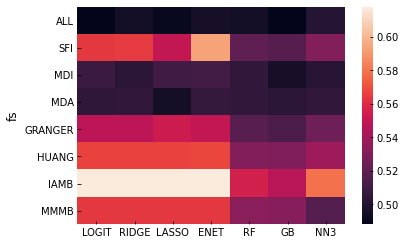

In [6]:
is_auc_df = is_melt_auc_df.pivot_table(index=['fs'], columns=['model'], values=['isauc'], aggfunc='median')
simple_cols = [c[1] for c in is_auc_df.columns]
is_auc_df.columns = simple_cols
is_auc_df = is_auc_df.loc[fs_methods2][models2].apply(lambda x: np.round(x,3))

display(Markdown("### 1.1) In sample AUC median values"))
display(HTML(is_auc_df.to_html()))
sns.heatmap(is_auc_df);

In [7]:
print((is_auc_df * 100).reset_index().to_latex(index=False))

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &  ENET &   RF &   GB &  NN3 \\
\midrule
    ALL &   48.8 &   49.5 &   49.1 &  49.6 & 49.5 & 48.8 & 50.1 \\
    SFI &   56.4 &   56.5 &   55.0 &  59.4 & 52.0 & 51.7 & 53.1 \\
    MDI &   50.8 &   50.3 &   51.0 &  51.1 & 50.5 & 49.6 & 50.2 \\
    MDA &   50.4 &   50.5 &   49.5 &  50.6 & 50.5 & 50.3 & 50.5 \\
GRANGER &   54.8 &   54.8 &   55.3 &  55.0 & 51.8 & 51.4 & 52.5 \\
  HUANG &   56.7 &   56.7 &   56.7 &  56.8 & 53.1 & 53.0 & 53.9 \\
   IAMB &   61.8 &   61.8 &   61.8 &  61.8 & 55.6 & 54.7 & 57.9 \\
   MMMB &   56.4 &   56.4 &   56.4 &  56.4 & 53.3 & 53.2 & 51.6 \\
\bottomrule
\end{tabular}



In [8]:
is_auc_df.mean(axis=1).sort_values()

fs
ALL        0.493429
MDA        0.503286
MDI        0.505000
GRANGER    0.536571
MMMB       0.548143
SFI        0.548714
HUANG      0.552714
IAMB       0.593429
dtype: float64

In [9]:
is_auc_df.mean(axis=0).sort_values()

GB       0.515875
RF       0.520375
NN3      0.524750
LASSO    0.543500
LOGIT    0.545125
RIDGE    0.545625
ENET     0.550875
dtype: float64

### 1.2) Out of sample AUC median values

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,0.500,0.499,0.501,0.504,0.495,0.501,0.495
SFI,0.508,0.500,0.503,0.504,0.485,0.496,0.500
MDI,0.497,0.501,0.503,0.496,0.492,0.491,0.498
MDA,0.504,0.502,0.503,0.498,0.501,0.496,0.498
GRANGER,0.505,0.505,0.506,0.506,0.495,0.497,0.498
HUANG,0.501,0.501,0.501,0.501,0.496,0.501,0.496
IAMB,0.505,0.505,0.504,0.505,0.501,0.496,0.504
MMMB,0.492,0.492,0.492,0.492,0.491,0.496,0.496


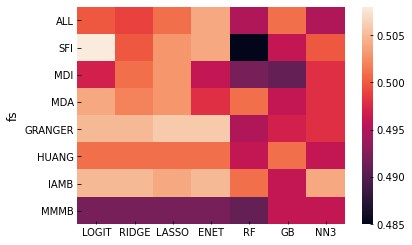

In [10]:
oos_auc_df = oos_melt_auc_df.pivot_table(index=['fs'], columns=['model'], values=['oosauc'], aggfunc='median')
simple_cols = [c[1] for c in oos_auc_df.columns]
oos_auc_df.columns = simple_cols
oos_auc_df = oos_auc_df.loc[fs_methods2][models2].apply(lambda x: np.round(x,3))

display(Markdown("### 1.2) Out of sample AUC median values"))
display(HTML(oos_auc_df.to_html()))
sns.heatmap(oos_auc_df);

In [11]:
print((oos_auc_df * 100).reset_index().to_latex(index=False))

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &  ENET &   RF &   GB &  NN3 \\
\midrule
    ALL &   50.0 &   49.9 &   50.1 &  50.4 & 49.5 & 50.1 & 49.5 \\
    SFI &   50.8 &   50.0 &   50.3 &  50.4 & 48.5 & 49.6 & 50.0 \\
    MDI &   49.7 &   50.1 &   50.3 &  49.6 & 49.2 & 49.1 & 49.8 \\
    MDA &   50.4 &   50.2 &   50.3 &  49.8 & 50.1 & 49.6 & 49.8 \\
GRANGER &   50.5 &   50.5 &   50.6 &  50.6 & 49.5 & 49.7 & 49.8 \\
  HUANG &   50.1 &   50.1 &   50.1 &  50.1 & 49.6 & 50.1 & 49.6 \\
   IAMB &   50.5 &   50.5 &   50.4 &  50.5 & 50.1 & 49.6 & 50.4 \\
   MMMB &   49.2 &   49.2 &   49.2 &  49.2 & 49.1 & 49.6 & 49.6 \\
\bottomrule
\end{tabular}



In [12]:
oos_auc_df.mean(axis=0)

LOGIT    0.501500
RIDGE    0.500625
LASSO    0.501625
ENET     0.500750
RF       0.494500
GB       0.496750
NN3      0.498125
dtype: float64

In [13]:
oos_auc_df.mean(axis=1)

fs
ALL        0.499286
SFI        0.499429
MDI        0.496857
MDA        0.500286
GRANGER    0.501714
HUANG      0.499571
IAMB       0.502857
MMMB       0.493000
dtype: float64

### 1.3) Out of sample AUC distribution across models

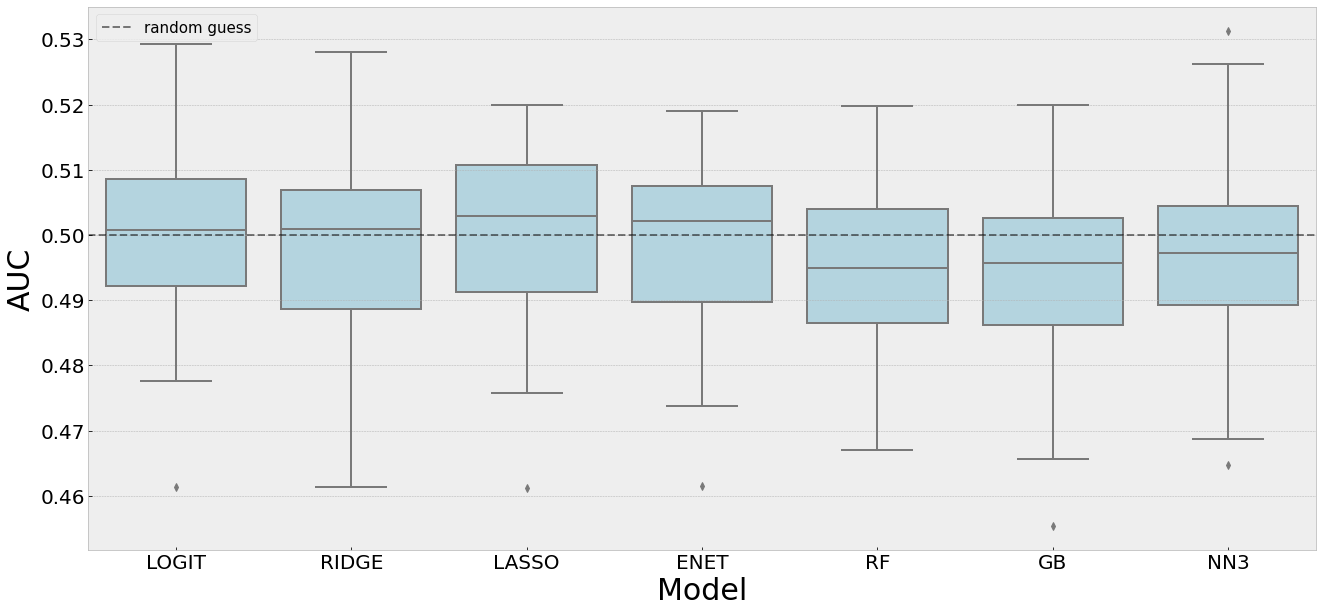

In [14]:
display(Markdown("### 1.3) Out of sample AUC distribution across models"))

fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="model", y='oosauc',data=oos_melt_auc_df, ax=ax, order=models2, color='lightblue');
ax.set_ylabel("AUC", fontsize=30);
ax.set_xlabel("Model", fontsize=30);
ax.axhline(y=0.50, color='k', linestyle='--', alpha=0.5, label="random guess");
ax.tick_params(axis="x", labelsize=20);
ax.tick_params(axis="y", labelsize=20);
ax.legend(loc="best",fontsize=15);
fig.savefig('img/oos_auc_models_distr.png')

### 1.4) Out of sample AUC distribution across feature selection methods

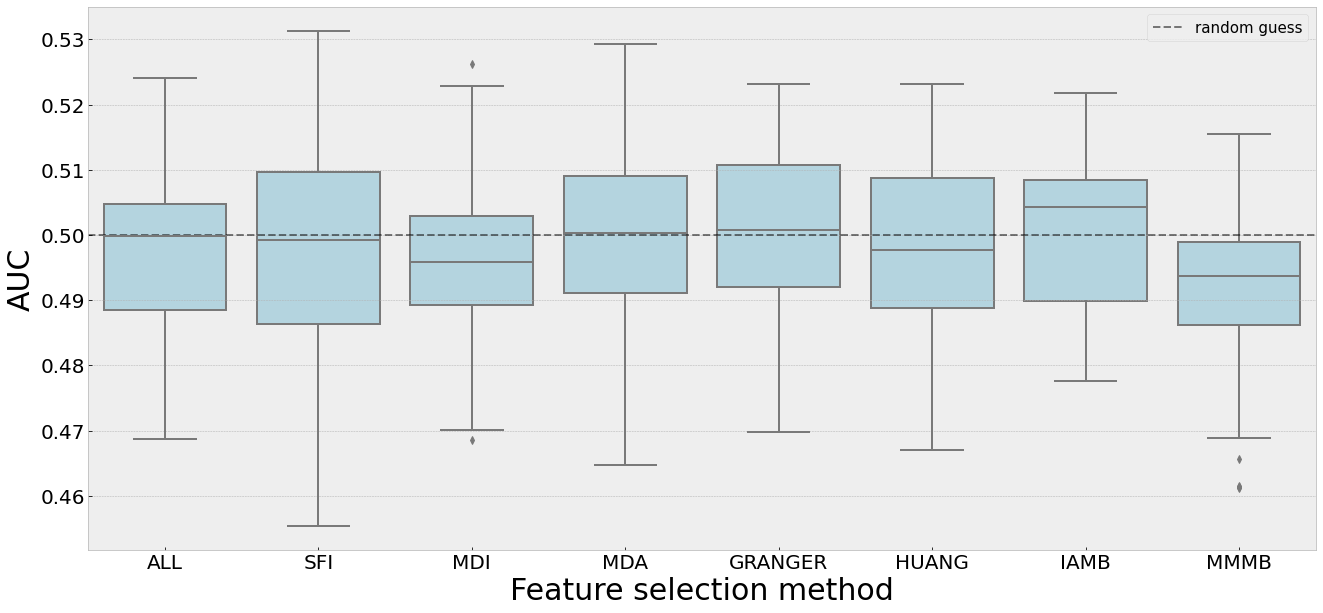

In [15]:
display(Markdown("### 1.4) Out of sample AUC distribution across feature selection methods"))

fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="fs", y='oosauc',data=oos_melt_auc_df, ax=ax, order=fs_methods2, color='lightblue');
ax.set_ylabel("AUC", fontsize=30);
ax.set_xlabel("Feature selection method", fontsize=30);
ax.axhline(y=0.50, color='k', linestyle='--', alpha=0.5, label="random guess");
ax.tick_params(axis="x", labelsize=20);
ax.tick_params(axis="y", labelsize=20);
ax.legend(loc="best",fontsize=15);
fig.savefig('img/oos_auc_fs_methods_distr.png')

### 1.5) Out of sample AUC distribution across models (SPX index only)

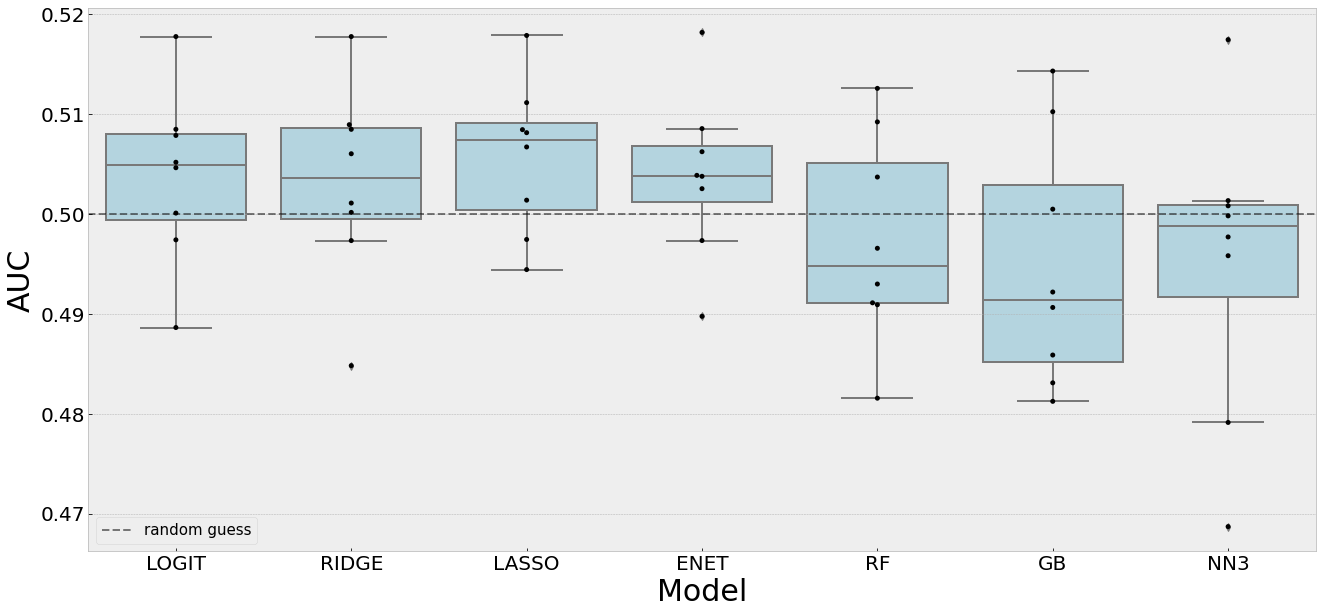

In [21]:
oos_spx_auc_df = oos_melt_auc_df[oos_melt_auc_df["ticker"] == "SPX Index"].reset_index(drop=True)


display(Markdown("### 1.5) Out of sample AUC distribution across models (SPX index only)"))

fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="model", y='oosauc',
            data=oos_spx_auc_df, ax=ax, order=models2, color='lightblue');
sns.swarmplot(x="model", y='oosauc',
              data=oos_spx_auc_df,ax=ax,
              color="k",order=models2)

ax.set_ylabel("AUC", fontsize=30);
ax.set_xlabel("Model", fontsize=30);
ax.axhline(y=0.50, color='k', linestyle='--', alpha=0.5, label="random guess");
ax.tick_params(axis="x", labelsize=20);
ax.tick_params(axis="y", labelsize=20);
ax.legend(loc="best",fontsize=15);
fig.savefig('img/oos_auc_models_distr_spx.png')


### 1.2) Out of sample AUC median values

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,0.505,0.501,0.501,0.504,0.497,0.483,0.469
SFI,0.489,0.485,0.494,0.490,0.482,0.481,0.501
MDI,0.505,0.506,0.511,0.503,0.491,0.492,0.496
MDA,0.508,0.509,0.508,0.506,0.493,0.491,0.479
GRANGER,0.500,0.500,0.507,0.504,0.491,0.486,0.500
HUANG,0.518,0.518,0.518,0.518,0.504,0.500,0.498
IAMB,0.508,0.508,0.508,0.509,0.513,0.510,0.517
MMMB,0.497,0.497,0.497,0.497,0.509,0.514,0.501


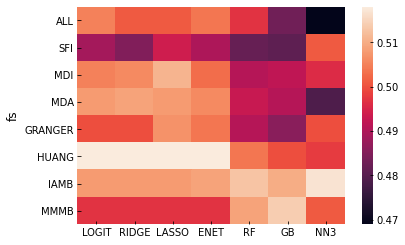

In [23]:
oos_spx_auc_df1 = oos_spx_auc_df.copy()
oos_spx_auc_df1 = oos_spx_auc_df.pivot_table(index=['fs'], columns=['model'], values=['oosauc'], aggfunc='median')
simple_cols = [c[1] for c in oos_spx_auc_df1.columns]
oos_spx_auc_df1.columns = simple_cols
oos_spx_auc_df1 = oos_spx_auc_df1.loc[fs_methods2][models2].apply(lambda x: np.round(x,3))

display(Markdown("### 1.2) Out of sample AUC median values"))
display(HTML(oos_spx_auc_df1.to_html()))
sns.heatmap(oos_spx_auc_df1);

In [24]:
print((oos_spx_auc_df1 * 100).reset_index().to_latex(index=False))

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &  ENET &   RF &   GB &  NN3 \\
\midrule
    ALL &   50.5 &   50.1 &   50.1 &  50.4 & 49.7 & 48.3 & 46.9 \\
    SFI &   48.9 &   48.5 &   49.4 &  49.0 & 48.2 & 48.1 & 50.1 \\
    MDI &   50.5 &   50.6 &   51.1 &  50.3 & 49.1 & 49.2 & 49.6 \\
    MDA &   50.8 &   50.9 &   50.8 &  50.6 & 49.3 & 49.1 & 47.9 \\
GRANGER &   50.0 &   50.0 &   50.7 &  50.4 & 49.1 & 48.6 & 50.0 \\
  HUANG &   51.8 &   51.8 &   51.8 &  51.8 & 50.4 & 50.0 & 49.8 \\
   IAMB &   50.8 &   50.8 &   50.8 &  50.9 & 51.3 & 51.0 & 51.7 \\
   MMMB &   49.7 &   49.7 &   49.7 &  49.7 & 50.9 & 51.4 & 50.1 \\
\bottomrule
\end{tabular}



### 1.6) Out of sample AUC distribution across feature selection methods (SPX index only)

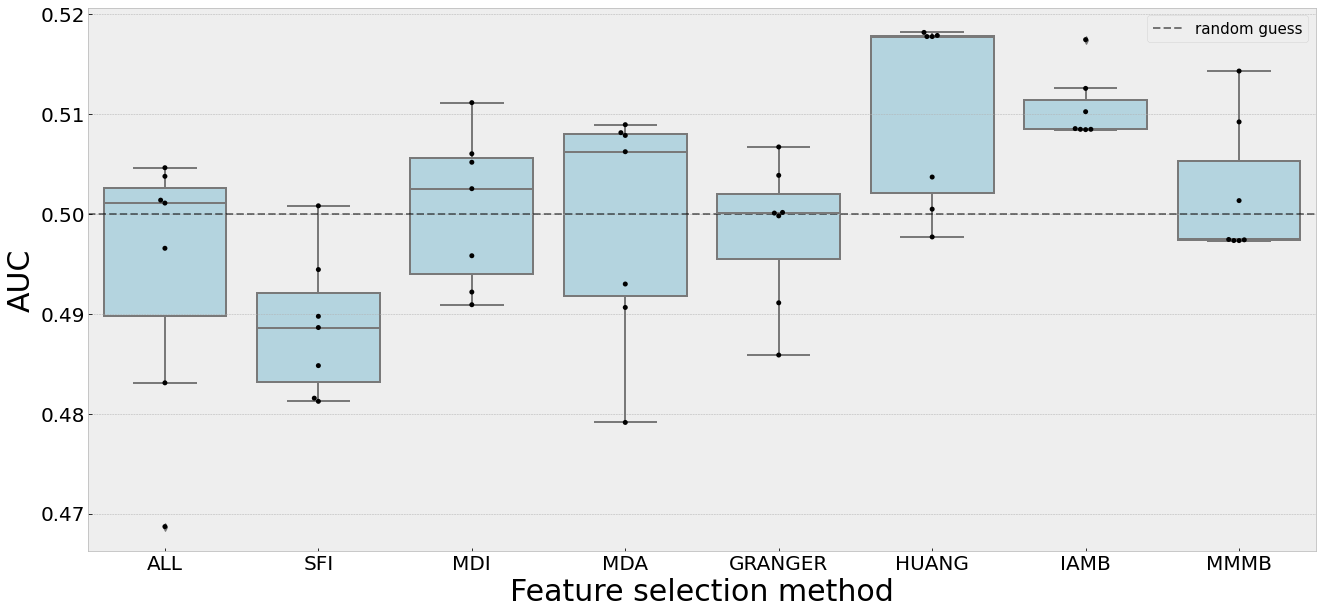

In [25]:
display(Markdown("### 1.6) Out of sample AUC distribution across feature selection methods (SPX index only)"))

fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="fs", y='oosauc',data=oos_spx_auc_df, ax=ax, order=fs_methods2, color='lightblue');
sns.swarmplot(x="fs", y='oosauc',
              data=oos_spx_auc_df,ax=ax,
              color="k",order=fs_methods2)
ax.set_ylabel("AUC", fontsize=30);
ax.set_xlabel("Feature selection method", fontsize=30);
ax.axhline(y=0.50, color='k', linestyle='--', alpha=0.5, label="random guess");
ax.tick_params(axis="x", labelsize=20);
ax.tick_params(axis="y", labelsize=20);
ax.legend(loc="best",fontsize=15);
fig.savefig('img/oos_auc_fs_methods_distr_spx.png')

In [26]:
oos_spx_auc_df.groupby(by=['ticker', 'fs'], as_index=True).median()['oosauc']

ticker     fs     
SPX Index  ALL        0.501096
           GRANGER    0.500092
           HUANG      0.517772
           IAMB       0.508553
           MDA        0.506239
           MDI        0.502536
           MMMB       0.497448
           SFI        0.488627
Name: oosauc, dtype: float64

## 2) Sharpe ratio

In [27]:
oos_pred_ret_df, oos_pred_pos_df = gen_strat_positions_and_ret_from_pred(predictions_df=oos_melt_predictions_df,
                                                                         class_threshold=0.5,
                                                                         target_asset_returns=benchmark_df)
ret_all_df = pd.concat([oos_pred_ret_df, benchmark_df], axis=0)
sr_rank_df, sr_tb_df, sr_agg_df = sharpe_ratio_tb(returns_df=ret_all_df.dropna(),
                                                  level_to_subset='fs',
                                                  rf=.0)

ret_all_df = pd.concat([oos_pred_ret_df, benchmark_df], axis=0)
sr_rank_df, sr_tb_df, sr_agg_df = sharpe_ratio_tb(returns_df=ret_all_df.dropna(),
                                                  level_to_subset='fs',
                                                  rf=.0)

sr_df = sr_rank_df.reset_index()
sr_df_raw = sr_df.loc[sr_df["fs"]=="raw"].reset_index(drop=True)
sr_df = sr_df.loc[sr_df["fs"]!="raw"].reset_index(drop=True)
sr_df_spx = sr_df.loc[sr_df["ticker"]=="SPX Index"].reset_index(drop=True)

# average_sr = np.median([sr_df.groupby(by=['model'], as_index=True).median()['sharpe ratio'].median(), sr_df.groupby(by=['fs'], as_index=True).median()['sharpe ratio'].median()])

# Sanity Check
assert oos_melt_auc_df.shape[0] == sr_df.shape[0]

In [28]:
oos_benchmark_df = benchmark_df.loc[(benchmark_df['date'])>= oos_start_date]
pivot_oos_benchmark_df = oos_benchmark_df.pivot_table(index=['date'], columns=['model'], values=['value'])
pivot_oos_benchmark_df.columns = pivot_oos_benchmark_df.columns.droplevel()

In [29]:
pivot_oos_benchmark_df['Combined portfolio'] = pivot_oos_benchmark_df.mean(axis=1)

In [30]:
sr_benchmark = (pivot_oos_benchmark_df.mean() / pivot_oos_benchmark_df.std() * np.sqrt(252)).reset_index()
sr_benchmark.columns = ['ticker', 'sharpe ratio']

### 2.1) Out of sample Sharpe values median values (average benchmark 0.881)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,0.143,-0.126,0.030,0.334,0.605,0.129,0.669
SFI,0.064,0.210,0.006,0.155,0.661,0.011,0.638
MDI,0.025,0.070,0.100,0.218,0.713,-0.018,0.657
MDA,0.097,0.081,0.143,0.228,0.714,0.054,0.509
GRANGER,0.396,0.396,0.664,0.480,0.635,0.140,0.688
HUANG,0.716,0.716,0.714,0.684,0.717,0.367,0.708
IAMB,0.172,0.172,0.177,0.160,0.620,0.256,0.503
MMMB,0.616,0.616,0.640,0.625,0.690,0.575,0.641


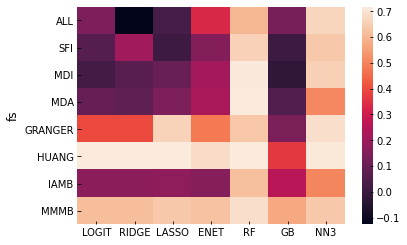

In [31]:
simple_sr_df = sr_df.pivot_table(index=['fs'], columns=['model'], values=['sharpe ratio'], aggfunc='median')
simple_cols = [c[1] for c in simple_sr_df.columns]
simple_sr_df.columns = simple_cols
simple_sr_df = simple_sr_df.loc[fs_methods2][models2].apply(lambda x: np.round(x,3))

average_sr = sr_benchmark.loc[sr_benchmark['ticker'] == 'Combined portfolio']['sharpe ratio'].iloc[0]

display(Markdown("### 2.1) Out of sample Sharpe values median values (average benchmark {:.3f})".format(average_sr)))
display(HTML(simple_sr_df.to_html()))
sns.heatmap(simple_sr_df);

In [32]:
print((simple_sr_df).reset_index().to_latex(index=False))

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &  ENET &    RF &     GB &   NN3 \\
\midrule
    ALL &  0.143 & -0.126 &  0.030 & 0.334 & 0.605 &  0.129 & 0.669 \\
    SFI &  0.064 &  0.210 &  0.006 & 0.155 & 0.661 &  0.011 & 0.638 \\
    MDI &  0.025 &  0.070 &  0.100 & 0.218 & 0.713 & -0.018 & 0.657 \\
    MDA &  0.097 &  0.081 &  0.143 & 0.228 & 0.714 &  0.054 & 0.509 \\
GRANGER &  0.396 &  0.396 &  0.664 & 0.480 & 0.635 &  0.140 & 0.688 \\
  HUANG &  0.716 &  0.716 &  0.714 & 0.684 & 0.717 &  0.367 & 0.708 \\
   IAMB &  0.172 &  0.172 &  0.177 & 0.160 & 0.620 &  0.256 & 0.503 \\
   MMMB &  0.616 &  0.616 &  0.640 & 0.625 & 0.690 &  0.575 & 0.641 \\
\bottomrule
\end{tabular}



In [33]:
# display(Markdown("### 2.2) Out of sample Sharpe ratio distribution across models"))

# fig, ax = plt.subplots(figsize=(22,10))
# sns.boxplot(x="model", y='sharpe ratio',data=sr_df, ax=ax, order=models2);
# ax.set_ylabel("Sharpe ratio", fontsize=30);
# ax.set_xlabel("Model", fontsize=30);
# ax.axhline(y=average_sr,
#            color='k',
#            linestyle='--',
#            alpha=0.5, label="Average Sharpe ratio");
# ax.tick_params(axis="x", labelsize=20);
# ax.tick_params(axis="y", labelsize=20);
# ax.legend(loc="best",fontsize=15);
# fig.savefig('img/oos_sr_models_distr.png')

In [34]:
# display(Markdown("### 2.3) Out of sample Sharpe ratio distribution across feature selection methods"))

# fig, ax = plt.subplots(figsize=(22,10))
# sns.boxplot(x="fs", y='sharpe ratio',data=sr_df, ax=ax, order=fs_methods2);
# ax.set_ylabel("Sharpe ratio", fontsize=30);
# ax.set_xlabel("Feature selection method", fontsize=30);
# ax.axhline(y=0.50, color='k', linestyle='--', alpha=0.5, label="random guess");
# ax.tick_params(axis="x", labelsize=20);
# ax.tick_params(axis="y", labelsize=20);
# ax.legend(loc="best",fontsize=15);
# fig.savefig('img/oos_sr_fs_methods_distr.png')

### 2.1) Out of sample Sharpe values median values SPX Index (median benchmark 0.914)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,0.218,-0.084,0.047,0.344,0.571,-0.421,0.581
SFI,-0.163,-0.324,-0.041,-0.037,0.666,-0.348,0.444
MDI,-0.088,-0.023,0.644,0.687,0.741,-0.196,0.643
MDA,0.590,0.637,0.621,0.867,0.678,-0.306,0.386
GRANGER,0.211,0.207,0.433,0.374,0.449,0.148,0.703
HUANG,0.727,0.727,0.724,0.641,0.946,0.360,0.772
IAMB,0.245,0.245,0.245,0.278,0.850,0.332,0.755
MMMB,0.555,0.555,0.616,0.555,0.676,0.621,0.753


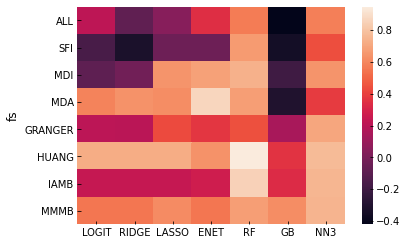

In [35]:
snp_sr_df_raw = sr_df.loc[(sr_df["fs"]=="raw")&(sr_df['ticker']=='SPX Index')].reset_index(drop=True)
snp_sr_df = sr_df.loc[(sr_df["fs"]!="raw")&(sr_df['ticker']=='SPX Index')].reset_index(drop=True)

# snp_average_sr = np.median([snp_sr_df.groupby(by=['model'], as_index=True).median()['sharpe ratio'].median(), snp_sr_df.groupby(by=['fs'], as_index=True).median()['sharpe ratio'].median()])
snp_average_sr = average_sr = sr_benchmark.loc[sr_benchmark['ticker'] == 'SPX Index']['sharpe ratio'].iloc[0]

snp_simple_sr_df = snp_sr_df.pivot_table(index=['fs'], columns=['model'], values=['sharpe ratio'], aggfunc='median')
simple_cols = [c[1] for c in snp_simple_sr_df.columns]
snp_simple_sr_df.columns = simple_cols
snp_simple_sr_df = snp_simple_sr_df.loc[fs_methods2][models2].apply(lambda x: np.round(x,3))

display(Markdown("### 2.1) Out of sample Sharpe values median values SPX Index (median benchmark {:.3f})".format(snp_average_sr)))
display(HTML(snp_simple_sr_df.to_html()))
sns.heatmap(snp_simple_sr_df);

In [36]:
for ticker in sr_df['ticker'].unique():
    aux_sr_df_raw = sr_df.loc[(sr_df["fs"]=="raw")&(sr_df['ticker']==ticker)].reset_index(drop=True)
    aux_sr_df = sr_df.loc[(sr_df["fs"]!="raw")&(sr_df['ticker']==ticker)].reset_index(drop=True)

    aux_average_sr = average_sr = sr_benchmark.loc[sr_benchmark['ticker'] == ticker]['sharpe ratio'].iloc[0]

    aux_simple_sr_df = aux_sr_df.pivot_table(index=['fs'], columns=['model'], values=['sharpe ratio'], aggfunc='median')
    simple_cols = [c[1] for c in aux_simple_sr_df.columns]
    aux_simple_sr_df.columns = simple_cols
    aux_simple_sr_df = aux_simple_sr_df.loc[fs_methods2][models2].apply(lambda x: np.round(x,3))

    display(Markdown("### 2.1) Out of sample Sharpe values median values " + ticker + " (median benchmark {:.3f})".format(aux_average_sr)))
    display(HTML(aux_simple_sr_df.to_html()))
    # sns.heatmap(aux_simple_sr_df);

### 2.1) Out of sample Sharpe values median values SPX Communications (median benchmark 1.057)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,-0.250,-0.197,0.013,0.323,0.889,0.517,1.017
SFI,0.141,0.200,0.070,0.108,1.390,0.492,0.879
MDI,-0.136,-0.203,-0.667,0.118,0.821,-0.306,1.017
MDA,-0.142,0.040,0.017,0.160,0.989,-0.802,0.865
GRANGER,-0.346,0.125,-0.303,-0.146,1.084,-0.202,0.673
HUANG,0.041,0.038,0.045,0.045,0.964,-0.503,0.824
IAMB,0.172,0.172,0.128,0.153,0.852,0.481,0.487
MMMB,0.702,0.702,0.704,0.697,0.723,0.559,0.606


### 2.1) Out of sample Sharpe values median values SPX Technology (median benchmark 1.250)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,-0.298,-0.246,-0.218,0.244,0.884,0.262,1.106
SFI,-0.013,0.377,-0.296,-0.184,1.118,-0.222,0.759
MDI,0.549,0.313,0.447,0.380,1.040,0.085,1.112
MDA,-0.210,-0.398,-0.303,-0.085,1.270,0.611,0.954
GRANGER,0.393,0.392,0.683,0.510,1.181,0.395,1.003
HUANG,1.083,1.102,1.138,1.001,1.340,0.132,0.955
IAMB,0.172,0.172,0.172,0.151,0.540,0.085,0.938
MMMB,0.801,0.801,0.818,0.801,0.704,0.812,1.220


### 2.1) Out of sample Sharpe values median values SPX Consumer Non cyclical (median benchmark 1.193)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,0.085,-0.168,-0.476,0.532,1.155,0.076,0.772
SFI,0.281,0.333,0.445,0.409,1.108,0.222,0.759
MDI,0.267,0.314,0.132,0.474,1.154,0.010,1.146
MDA,-0.160,-0.261,0.044,0.297,1.077,0.172,1.180
GRANGER,0.920,0.920,0.917,0.920,1.284,0.243,0.781
HUANG,0.839,0.839,0.841,0.839,1.144,0.037,0.758
IAMB,0.934,0.951,0.932,0.930,0.884,0.938,0.649
MMMB,1.273,1.273,1.253,1.273,1.337,1.278,1.203


### 2.1) Out of sample Sharpe values median values SPX Utilities (median benchmark 0.673)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,0.459,0.216,0.373,0.080,0.459,0.349,0.366
SFI,0.887,0.675,1.192,0.927,0.781,0.452,0.089
MDI,0.375,0.388,0.639,0.242,0.974,-0.046,0.520
MDA,0.493,0.186,0.610,1.032,0.534,0.069,0.574
GRANGER,0.400,0.400,0.332,0.403,0.625,0.084,0.580
HUANG,0.761,0.761,0.758,0.761,0.735,0.505,0.626
IAMB,0.141,0.113,0.056,0.139,0.623,0.249,0.331
MMMB,0.581,0.581,0.629,0.595,0.434,0.204,0.525


### 2.1) Out of sample Sharpe values median values CCMP Index (median benchmark 1.083)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,-0.450,-0.316,-0.207,0.098,0.809,0.108,1.088
SFI,0.393,0.864,0.236,0.641,0.591,0.529,1.011
MDI,-0.094,-0.143,0.187,0.238,0.685,-0.101,0.486
MDA,-0.492,-0.354,-0.582,0.031,0.405,0.322,1.112
GRANGER,0.908,0.946,0.943,0.923,0.915,0.306,0.907
HUANG,0.975,0.955,1.024,0.979,1.167,0.526,1.103
IAMB,0.444,0.444,0.480,0.444,0.980,0.930,1.027
MMMB,0.651,0.651,0.651,0.654,1.095,0.535,0.864


### 2.1) Out of sample Sharpe values median values SPX Industrial (median benchmark 0.916)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,0.200,0.207,0.527,0.807,0.451,0.704,0.666
SFI,0.474,0.220,0.049,0.451,0.534,0.163,0.645
MDI,0.086,0.172,0.072,0.056,0.779,0.231,0.330
MDA,0.554,0.656,0.451,0.918,0.790,0.437,0.912
GRANGER,0.789,0.742,0.752,0.785,1.152,0.411,0.955
HUANG,0.794,0.822,0.800,0.793,0.688,0.601,0.853
IAMB,-0.167,-0.167,-0.166,-0.156,0.646,-0.311,0.663
MMMB,0.942,0.942,0.942,0.942,0.872,0.839,0.973


### 2.1) Out of sample Sharpe values median values SPX Index (median benchmark 0.914)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,0.218,-0.084,0.047,0.344,0.571,-0.421,0.581
SFI,-0.163,-0.324,-0.041,-0.037,0.666,-0.348,0.444
MDI,-0.088,-0.023,0.644,0.687,0.741,-0.196,0.643
MDA,0.590,0.637,0.621,0.867,0.678,-0.306,0.386
GRANGER,0.211,0.207,0.433,0.374,0.449,0.148,0.703
HUANG,0.727,0.727,0.724,0.641,0.946,0.360,0.772
IAMB,0.245,0.245,0.245,0.278,0.850,0.332,0.755
MMMB,0.555,0.555,0.616,0.555,0.676,0.621,0.753


### 2.1) Out of sample Sharpe values median values SPX Financial (median benchmark 0.715)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,0.279,0.565,0.470,0.728,0.855,-0.403,0.700
SFI,-0.204,-0.169,-0.188,0.314,0.938,0.193,0.083
MDI,0.218,0.162,0.099,0.199,0.540,-0.337,0.242
MDA,0.643,0.716,0.435,0.393,0.818,0.357,0.075
GRANGER,0.927,0.930,0.915,0.919,0.543,0.133,0.598
HUANG,0.483,0.483,0.483,0.483,0.386,-0.273,0.574
IAMB,0.064,0.062,0.064,0.080,0.617,0.505,0.520
MMMB,0.052,0.041,0.182,0.041,0.264,0.591,0.252


### 2.1) Out of sample Sharpe values median values SPX Consumer Cyclical (median benchmark 0.794)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,-0.433,-0.536,-0.493,0.749,0.481,0.134,0.371
SFI,-0.173,-0.218,-0.275,-0.543,0.478,-0.520,0.631
MDI,-0.036,-0.056,-0.069,0.005,0.399,0.379,0.671
MDA,-0.323,-0.172,-0.089,-0.159,0.750,-0.073,0.177
GRANGER,0.896,0.890,0.907,0.885,0.646,0.365,0.774
HUANG,0.705,0.705,0.705,0.727,0.699,0.373,0.624
IAMB,0.047,0.047,0.006,0.042,0.412,0.263,0.191
MMMB,0.757,0.757,0.757,0.765,0.793,0.720,0.575


### 2.1) Out of sample Sharpe values median values RTY Index (median benchmark 0.673)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,-0.122,-0.283,-0.188,-0.191,0.639,0.300,0.673
SFI,-0.210,-0.016,-0.037,-0.044,0.655,-0.701,0.700
MDI,0.289,0.210,0.100,-0.224,0.532,0.188,0.862
MDA,0.145,0.122,0.253,-0.046,0.357,0.038,-0.398
GRANGER,-0.043,0.010,-0.036,0.026,-0.317,0.025,0.400
HUANG,0.287,0.287,0.287,0.302,0.494,0.766,0.610
IAMB,0.168,0.168,0.181,0.168,0.542,-0.384,0.195
MMMB,0.423,0.423,0.423,0.423,0.123,0.188,0.367


### 2.1) Out of sample Sharpe values median values SPX Energy (median benchmark 0.058)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,0.425,0.301,0.049,0.027,0.058,-0.004,-0.030
SFI,-0.175,-0.287,-0.326,-0.348,-0.304,-0.296,-0.319
MDI,-0.176,-0.129,-0.247,0.277,-0.165,0.090,0.221
MDA,0.797,0.564,0.242,-0.441,0.243,-0.494,-0.079
GRANGER,0.297,0.336,0.644,0.449,-0.485,0.006,0.094
HUANG,0.349,0.349,0.338,0.332,0.064,0.031,0.128
IAMB,0.347,0.347,0.339,0.337,-0.027,-0.078,0.418
MMMB,0.100,0.100,0.100,0.107,-0.106,0.154,-0.137


### 2.1) Out of sample Sharpe values median values SPX Basic Materials (median benchmark 0.663)

,LOGIT,RIDGE,LASSO,ENET,RF,GB,NN3
fs,,,,,,,
ALL,0.265,0.219,0.157,0.365,0.298,0.123,0.657
SFI,0.597,0.631,0.225,0.203,0.180,-0.141,0.072
MDI,-0.467,-0.407,-0.468,-0.547,0.051,-0.463,0.720
MDA,0.050,-0.127,-0.325,0.657,0.137,-0.041,0.443
GRANGER,0.349,0.349,0.394,0.346,0.336,-0.123,0.503
HUANG,0.639,0.639,0.639,0.639,0.545,0.596,0.657
IAMB,0.503,0.503,0.482,0.482,0.379,0.153,0.339
MMMB,0.378,0.378,0.378,0.378,0.150,0.355,0.677


In [37]:
for ticker in sr_df['ticker'].unique():
    aux_sr_df_raw = sr_df.loc[(sr_df["fs"]=="raw")&(sr_df['ticker']==ticker)].reset_index(drop=True)
    aux_sr_df = sr_df.loc[(sr_df["fs"]!="raw")&(sr_df['ticker']==ticker)].reset_index(drop=True)

    aux_average_sr = np.median([aux_sr_df.groupby(by=['model'], as_index=True).median()['sharpe ratio'].median(), aux_sr_df.groupby(by=['fs'], as_index=True).median()['sharpe ratio'].median()])

    aux_simple_sr_df = aux_sr_df.pivot_table(index=['fs'], columns=['model'], values=['sharpe ratio'], aggfunc='median')
    simple_cols = [c[1] for c in aux_simple_sr_df.columns]
    aux_simple_sr_df.columns = simple_cols
    aux_simple_sr_df = aux_simple_sr_df.loc[fs_methods2][models2].apply(lambda x: np.round(x,3))

    display(Markdown("### 2.1) Out of sample Sharpe values median values " + ticker + " (median benchmark {:.3f})".format(aux_average_sr)))
    print((aux_simple_sr_df).reset_index().to_latex(index=False))
    # sns.heatmap(aux_simple_sr_df);

### 2.1) Out of sample Sharpe values median values SPX Communications (median benchmark 0.122)

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &   ENET &    RF &     GB &   NN3 \\
\midrule
    ALL & -0.250 & -0.197 &  0.013 &  0.323 & 0.889 &  0.517 & 1.017 \\
    SFI &  0.141 &  0.200 &  0.070 &  0.108 & 1.390 &  0.492 & 0.879 \\
    MDI & -0.136 & -0.203 & -0.667 &  0.118 & 0.821 & -0.306 & 1.017 \\
    MDA & -0.142 &  0.040 &  0.017 &  0.160 & 0.989 & -0.802 & 0.865 \\
GRANGER & -0.346 &  0.125 & -0.303 & -0.146 & 1.084 & -0.202 & 0.673 \\
  HUANG &  0.041 &  0.038 &  0.045 &  0.045 & 0.964 & -0.503 & 0.824 \\
   IAMB &  0.172 &  0.172 &  0.128 &  0.153 & 0.852 &  0.481 & 0.487 \\
   MMMB &  0.702 &  0.702 &  0.704 &  0.697 & 0.723 &  0.559 & 0.606 \\
\bottomrule
\end{tabular}



### 2.1) Out of sample Sharpe values median values SPX Technology (median benchmark 0.329)

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &   ENET &    RF &     GB &   NN3 \\
\midrule
    ALL & -0.298 & -0.246 & -0.218 &  0.244 & 0.884 &  0.262 & 1.106 \\
    SFI & -0.013 &  0.377 & -0.296 & -0.184 & 1.118 & -0.222 & 0.759 \\
    MDI &  0.549 &  0.313 &  0.447 &  0.380 & 1.040 &  0.085 & 1.112 \\
    MDA & -0.210 & -0.398 & -0.303 & -0.085 & 1.270 &  0.611 & 0.954 \\
GRANGER &  0.393 &  0.392 &  0.683 &  0.510 & 1.181 &  0.395 & 1.003 \\
  HUANG &  1.083 &  1.102 &  1.138 &  1.001 & 1.340 &  0.132 & 0.955 \\
   IAMB &  0.172 &  0.172 &  0.172 &  0.151 & 0.540 &  0.085 & 0.938 \\
   MMMB &  0.801 &  0.801 &  0.818 &  0.801 & 0.704 &  0.812 & 1.220 \\
\bottomrule
\end{tabular}



### 2.1) Out of sample Sharpe values median values SPX Consumer Non cyclical (median benchmark 0.633)

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &  ENET &    RF &    GB &   NN3 \\
\midrule
    ALL &  0.085 & -0.168 & -0.476 & 0.532 & 1.155 & 0.076 & 0.772 \\
    SFI &  0.281 &  0.333 &  0.445 & 0.409 & 1.108 & 0.222 & 0.759 \\
    MDI &  0.267 &  0.314 &  0.132 & 0.474 & 1.154 & 0.010 & 1.146 \\
    MDA & -0.160 & -0.261 &  0.044 & 0.297 & 1.077 & 0.172 & 1.180 \\
GRANGER &  0.920 &  0.920 &  0.917 & 0.920 & 1.284 & 0.243 & 0.781 \\
  HUANG &  0.839 &  0.839 &  0.841 & 0.839 & 1.144 & 0.037 & 0.758 \\
   IAMB &  0.934 &  0.951 &  0.932 & 0.930 & 0.884 & 0.938 & 0.649 \\
   MMMB &  1.273 &  1.273 &  1.253 & 1.273 & 1.337 & 1.278 & 1.203 \\
\bottomrule
\end{tabular}



### 2.1) Out of sample Sharpe values median values SPX Utilities (median benchmark 0.483)

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &  ENET &    RF &     GB &   NN3 \\
\midrule
    ALL &  0.459 &  0.216 &  0.373 & 0.080 & 0.459 &  0.349 & 0.366 \\
    SFI &  0.887 &  0.675 &  1.192 & 0.927 & 0.781 &  0.452 & 0.089 \\
    MDI &  0.375 &  0.388 &  0.639 & 0.242 & 0.974 & -0.046 & 0.520 \\
    MDA &  0.493 &  0.186 &  0.610 & 1.032 & 0.534 &  0.069 & 0.574 \\
GRANGER &  0.400 &  0.400 &  0.332 & 0.403 & 0.625 &  0.084 & 0.580 \\
  HUANG &  0.761 &  0.761 &  0.758 & 0.761 & 0.735 &  0.505 & 0.626 \\
   IAMB &  0.141 &  0.113 &  0.056 & 0.139 & 0.623 &  0.249 & 0.331 \\
   MMMB &  0.581 &  0.581 &  0.629 & 0.595 & 0.434 &  0.204 & 0.525 \\
\bottomrule
\end{tabular}



### 2.1) Out of sample Sharpe values median values CCMP Index (median benchmark 0.539)

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &  ENET &    RF &     GB &   NN3 \\
\midrule
    ALL & -0.450 & -0.316 & -0.207 & 0.098 & 0.809 &  0.108 & 1.088 \\
    SFI &  0.393 &  0.864 &  0.236 & 0.641 & 0.591 &  0.529 & 1.011 \\
    MDI & -0.094 & -0.143 &  0.187 & 0.238 & 0.685 & -0.101 & 0.486 \\
    MDA & -0.492 & -0.354 & -0.582 & 0.031 & 0.405 &  0.322 & 1.112 \\
GRANGER &  0.908 &  0.946 &  0.943 & 0.923 & 0.915 &  0.306 & 0.907 \\
  HUANG &  0.975 &  0.955 &  1.024 & 0.979 & 1.167 &  0.526 & 1.103 \\
   IAMB &  0.444 &  0.444 &  0.480 & 0.444 & 0.980 &  0.930 & 1.027 \\
   MMMB &  0.651 &  0.651 &  0.651 & 0.654 & 1.095 &  0.535 & 0.864 \\
\bottomrule
\end{tabular}



### 2.1) Out of sample Sharpe values median values SPX Industrial (median benchmark 0.552)

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &   ENET &    RF &     GB &   NN3 \\
\midrule
    ALL &  0.200 &  0.207 &  0.527 &  0.807 & 0.451 &  0.704 & 0.666 \\
    SFI &  0.474 &  0.220 &  0.049 &  0.451 & 0.534 &  0.163 & 0.645 \\
    MDI &  0.086 &  0.172 &  0.072 &  0.056 & 0.779 &  0.231 & 0.330 \\
    MDA &  0.554 &  0.656 &  0.451 &  0.918 & 0.790 &  0.437 & 0.912 \\
GRANGER &  0.789 &  0.742 &  0.752 &  0.785 & 1.152 &  0.411 & 0.955 \\
  HUANG &  0.794 &  0.822 &  0.800 &  0.793 & 0.688 &  0.601 & 0.853 \\
   IAMB & -0.167 & -0.167 & -0.166 & -0.156 & 0.646 & -0.311 & 0.663 \\
   MMMB &  0.942 &  0.942 &  0.942 &  0.942 & 0.872 &  0.839 & 0.973 \\
\bottomrule
\end{tabular}



### 2.1) Out of sample Sharpe values median values SPX Index (median benchmark 0.480)

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &   ENET &    RF &     GB &   NN3 \\
\midrule
    ALL &  0.218 & -0.084 &  0.047 &  0.344 & 0.571 & -0.421 & 0.581 \\
    SFI & -0.163 & -0.324 & -0.041 & -0.037 & 0.666 & -0.348 & 0.444 \\
    MDI & -0.088 & -0.023 &  0.644 &  0.687 & 0.741 & -0.196 & 0.643 \\
    MDA &  0.590 &  0.637 &  0.621 &  0.867 & 0.678 & -0.306 & 0.386 \\
GRANGER &  0.211 &  0.207 &  0.433 &  0.374 & 0.449 &  0.148 & 0.703 \\
  HUANG &  0.727 &  0.727 &  0.724 &  0.641 & 0.946 &  0.360 & 0.772 \\
   IAMB &  0.245 &  0.245 &  0.245 &  0.278 & 0.850 &  0.332 & 0.755 \\
   MMMB &  0.555 &  0.555 &  0.616 &  0.555 & 0.676 &  0.621 & 0.753 \\
\bottomrule
\end{tabular}



### 2.1) Out of sample Sharpe values median values SPX Financial (median benchmark 0.320)

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &  ENET &    RF &     GB &   NN3 \\
\midrule
    ALL &  0.279 &  0.565 &  0.470 & 0.728 & 0.855 & -0.403 & 0.700 \\
    SFI & -0.204 & -0.169 & -0.188 & 0.314 & 0.938 &  0.193 & 0.083 \\
    MDI &  0.218 &  0.162 &  0.099 & 0.199 & 0.540 & -0.337 & 0.242 \\
    MDA &  0.643 &  0.716 &  0.435 & 0.393 & 0.818 &  0.357 & 0.075 \\
GRANGER &  0.927 &  0.930 &  0.915 & 0.919 & 0.543 &  0.133 & 0.598 \\
  HUANG &  0.483 &  0.483 &  0.483 & 0.483 & 0.386 & -0.273 & 0.574 \\
   IAMB &  0.064 &  0.062 &  0.064 & 0.080 & 0.617 &  0.505 & 0.520 \\
   MMMB &  0.052 &  0.041 &  0.182 & 0.041 & 0.264 &  0.591 & 0.252 \\
\bottomrule
\end{tabular}



### 2.1) Out of sample Sharpe values median values SPX Consumer Cyclical (median benchmark 0.202)

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &   ENET &    RF &     GB &   NN3 \\
\midrule
    ALL & -0.433 & -0.536 & -0.493 &  0.749 & 0.481 &  0.134 & 0.371 \\
    SFI & -0.173 & -0.218 & -0.275 & -0.543 & 0.478 & -0.520 & 0.631 \\
    MDI & -0.036 & -0.056 & -0.069 &  0.005 & 0.399 &  0.379 & 0.671 \\
    MDA & -0.323 & -0.172 & -0.089 & -0.159 & 0.750 & -0.073 & 0.177 \\
GRANGER &  0.896 &  0.890 &  0.907 &  0.885 & 0.646 &  0.365 & 0.774 \\
  HUANG &  0.705 &  0.705 &  0.705 &  0.727 & 0.699 &  0.373 & 0.624 \\
   IAMB &  0.047 &  0.047 &  0.006 &  0.042 & 0.412 &  0.263 & 0.191 \\
   MMMB &  0.757 &  0.757 &  0.757 &  0.765 & 0.793 &  0.720 & 0.575 \\
\bottomrule
\end{tabular}



### 2.1) Out of sample Sharpe values median values RTY Index (median benchmark 0.145)

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &   ENET &     RF &     GB &    NN3 \\
\midrule
    ALL & -0.122 & -0.283 & -0.188 & -0.191 &  0.639 &  0.300 &  0.673 \\
    SFI & -0.210 & -0.016 & -0.037 & -0.044 &  0.655 & -0.701 &  0.700 \\
    MDI &  0.289 &  0.210 &  0.100 & -0.224 &  0.532 &  0.188 &  0.862 \\
    MDA &  0.145 &  0.122 &  0.253 & -0.046 &  0.357 &  0.038 & -0.398 \\
GRANGER & -0.043 &  0.010 & -0.036 &  0.026 & -0.317 &  0.025 &  0.400 \\
  HUANG &  0.287 &  0.287 &  0.287 &  0.302 &  0.494 &  0.766 &  0.610 \\
   IAMB &  0.168 &  0.168 &  0.181 &  0.168 &  0.542 & -0.384 &  0.195 \\
   MMMB &  0.423 &  0.423 &  0.423 &  0.423 &  0.123 &  0.188 &  0.367 \\
\bottomrule
\end{tabular}



### 2.1) Out of sample Sharpe values median values SPX Energy (median benchmark 0.171)

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &   ENET &     RF &     GB &    NN3 \\
\midrule
    ALL &  0.425 &  0.301 &  0.049 &  0.027 &  0.058 & -0.004 & -0.030 \\
    SFI & -0.175 & -0.287 & -0.326 & -0.348 & -0.304 & -0.296 & -0.319 \\
    MDI & -0.176 & -0.129 & -0.247 &  0.277 & -0.165 &  0.090 &  0.221 \\
    MDA &  0.797 &  0.564 &  0.242 & -0.441 &  0.243 & -0.494 & -0.079 \\
GRANGER &  0.297 &  0.336 &  0.644 &  0.449 & -0.485 &  0.006 &  0.094 \\
  HUANG &  0.349 &  0.349 &  0.338 &  0.332 &  0.064 &  0.031 &  0.128 \\
   IAMB &  0.347 &  0.347 &  0.339 &  0.337 & -0.027 & -0.078 &  0.418 \\
   MMMB &  0.100 &  0.100 &  0.100 &  0.107 & -0.106 &  0.154 & -0.137 \\
\bottomrule
\end{tabular}



### 2.1) Out of sample Sharpe values median values SPX Basic Materials (median benchmark 0.335)

\begin{tabular}{lrrrrrrr}
\toprule
     fs &  LOGIT &  RIDGE &  LASSO &   ENET &    RF &     GB &   NN3 \\
\midrule
    ALL &  0.265 &  0.219 &  0.157 &  0.365 & 0.298 &  0.123 & 0.657 \\
    SFI &  0.597 &  0.631 &  0.225 &  0.203 & 0.180 & -0.141 & 0.072 \\
    MDI & -0.467 & -0.407 & -0.468 & -0.547 & 0.051 & -0.463 & 0.720 \\
    MDA &  0.050 & -0.127 & -0.325 &  0.657 & 0.137 & -0.041 & 0.443 \\
GRANGER &  0.349 &  0.349 &  0.394 &  0.346 & 0.336 & -0.123 & 0.503 \\
  HUANG &  0.639 &  0.639 &  0.639 &  0.639 & 0.545 &  0.596 & 0.657 \\
   IAMB &  0.503 &  0.503 &  0.482 &  0.482 & 0.379 &  0.153 & 0.339 \\
   MMMB &  0.378 &  0.378 &  0.378 &  0.378 & 0.150 &  0.355 & 0.677 \\
\bottomrule
\end{tabular}



In [38]:
aux_average_sr

0.3353380110870736

### 2.4) Out of sample Sharpe ratio distribution across models (SPX Index only)

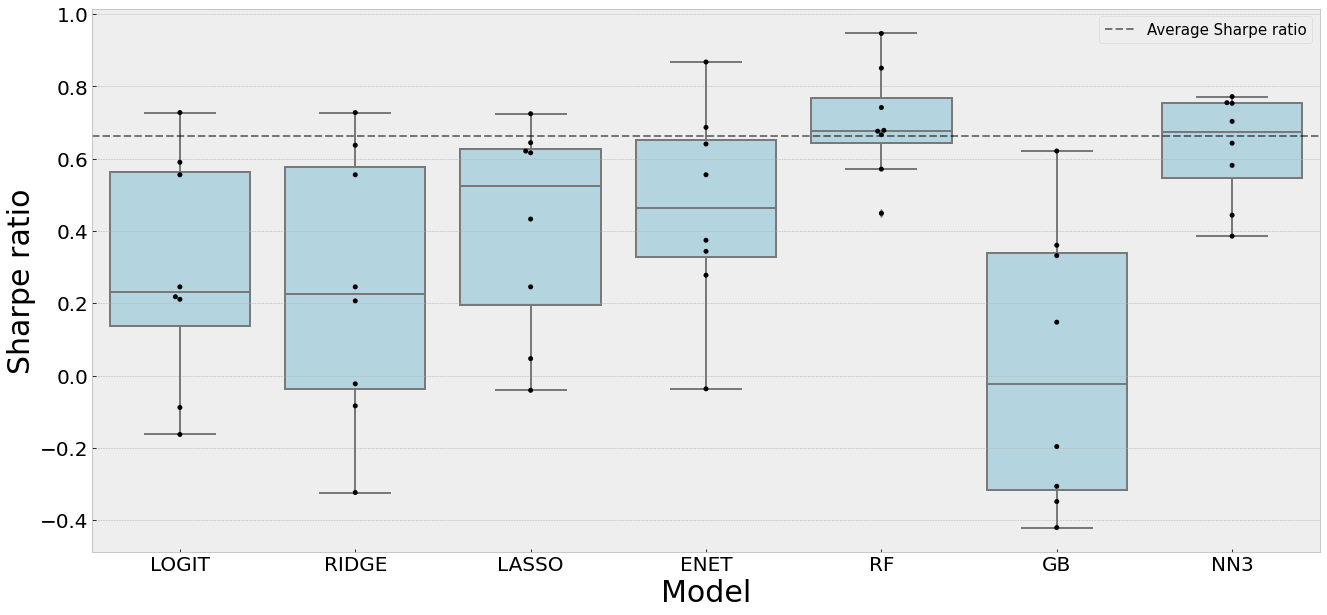

In [45]:
display(Markdown("### 2.4) Out of sample Sharpe ratio distribution across models (SPX Index only)"))

fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="model", y='sharpe ratio',data=sr_df_spx, ax=ax, order=models2, color='lightblue');
sns.swarmplot(x="model", y='sharpe ratio',
              data=sr_df_spx,ax=ax,
              color="k",order=models2)
ax.set_ylabel("Sharpe ratio", fontsize=30);
ax.set_xlabel("Model", fontsize=30);
ax.axhline(y=average_sr,
           color='k',
           linestyle='--',
           alpha=0.5, label="Average Sharpe ratio");
ax.tick_params(axis="x", labelsize=20);
ax.tick_params(axis="y", labelsize=20);
ax.legend(loc="best",fontsize=15);
fig.savefig('img/oos_sr_models_distr_spx.png')

### 2.5) Out of sample Sharpe ratio distribution across models (SPX Index only)

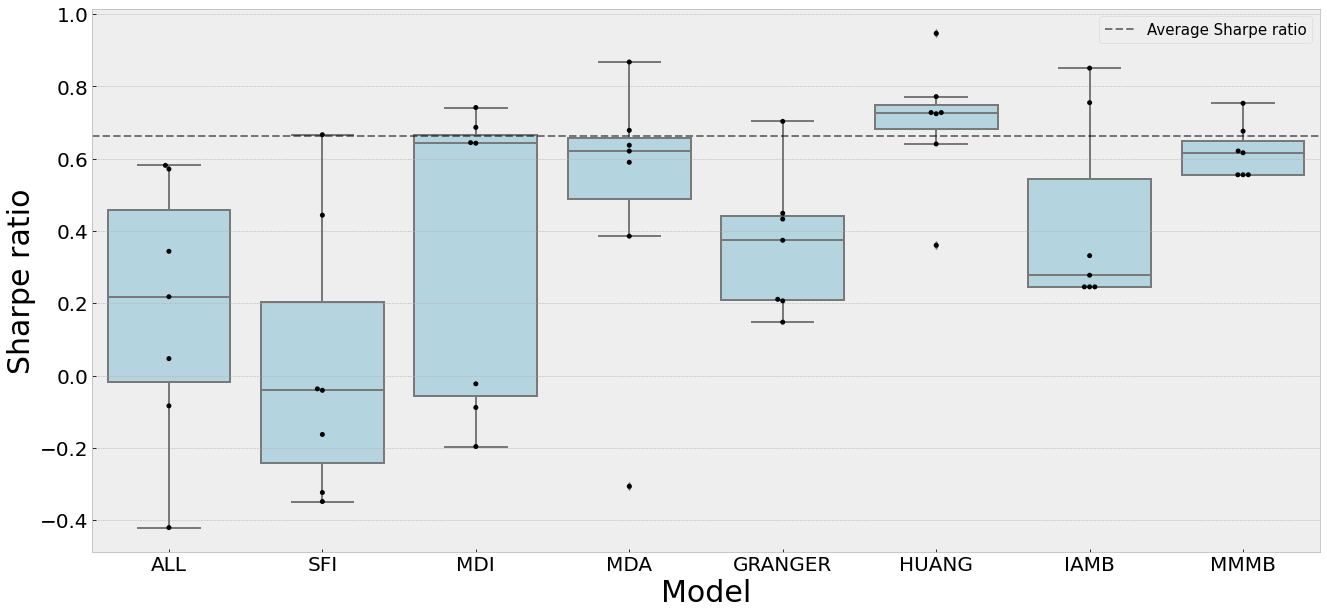

In [43]:
display(Markdown("### 2.5) Out of sample Sharpe ratio distribution across models (SPX Index only)"))

fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="fs", y='sharpe ratio',data=sr_df_spx, ax=ax, order=fs_methods2, color='lightblue');
sns.swarmplot(x="fs", y='sharpe ratio',
              data=sr_df_spx,ax=ax,
              color="k",order=fs_methods2)
ax.set_ylabel("Sharpe ratio", fontsize=30);
ax.set_xlabel("Model", fontsize=30);
ax.axhline(y=average_sr,
           color='k',
           linestyle='--',
           alpha=0.5, label="Average Sharpe ratio");
ax.tick_params(axis="x", labelsize=20);
ax.tick_params(axis="y", labelsize=20);
ax.legend(loc="best",fontsize=15);
fig.savefig('img/oos_sr_fs_methods_distr_spx.png')

## 3) Cummulative returns

In [44]:
summary_oos_pred_ret_df = oos_pred_ret_df.loc[oos_pred_ret_df['ticker']==ticker]
summary_benchmark_df = benchmark_df.loc[benchmark_df['ticker']==ticker]

IndexError: single positional indexer is out-of-bounds

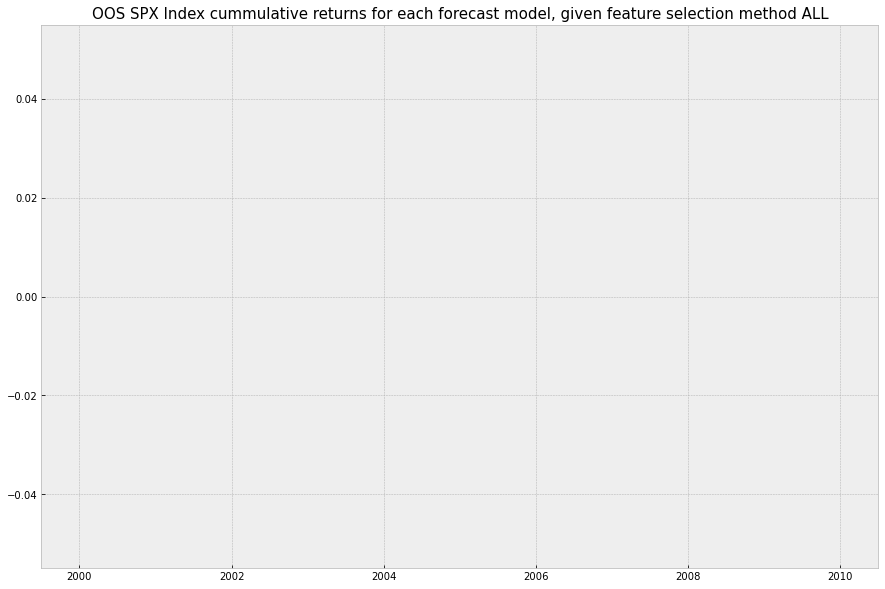

In [42]:
ticker = 'SPX Index'

for key1 in summary_oos_pred_ret_df['fs'].unique():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_title(label='OOS ' + ticker + ' cummulative returns for each forecast model, given feature selection method ' + key1, fontsize=15)

    for key2 in summary_oos_pred_ret_df['model'].unique():
        loop_df = summary_oos_pred_ret_df.loc[(summary_oos_pred_ret_df['fs'] == key1)&
                                              (summary_oos_pred_ret_df['model'] == key2)&
                                              (summary_oos_pred_ret_df['ticker'] == ticker)]
        ax.plot(pd.to_datetime(loop_df['date']), (1+loop_df['value']/100).cumprod(), label=key2)

    bench = summary_benchmark_df.loc[(summary_benchmark_df['ticker']==ticker)&(summary_benchmark_df['date'] >= loop_df['date'].iloc[0])]
    ax.plot(pd.to_datetime(bench['date']), (1+bench['value']/100).cumprod(), label='buy n hold ' + ticker, color='black', linewidth=2)
    
    plt.xlabel("Date")
    plt.ylabel("Cummulative returns of 1$ invested on the beginning of the sample")
    plt.legend(loc='best', fontsize=10)   
    fig.savefig('img/' + ticker + '_' + key1 + '_fs_methods.png')
    plt.show()

In [ ]:
for key1 in summary_oos_pred_ret_df['model'].unique():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_title(label='OOS ' + ticker + ' cummulative returns for each forecast model, given feature selection method ' + key1, fontsize=15)

    for key2 in summary_oos_pred_ret_df['fs'].unique():
        loop_df = summary_oos_pred_ret_df.loc[(summary_oos_pred_ret_df['model'] == key1)&
                                              (summary_oos_pred_ret_df['fs'] == key2)&
                                              (summary_oos_pred_ret_df['ticker'] == ticker)]
        ax.plot(pd.to_datetime(loop_df['date']), (1+loop_df['value']/100).cumprod(), label=key2)

    bench = summary_benchmark_df.loc[(summary_benchmark_df['ticker']==ticker)&(summary_benchmark_df['date'] >= loop_df['date'].iloc[0])]
    ax.plot(pd.to_datetime(bench['date']), (1+bench['value']/100).cumprod(), label='buy n hold ' + ticker, color='black', linewidth=2)
    
    plt.xlabel("Date")
    plt.ylabel("Cummulative returns of 1$ invested on the beginning of the sample")
    plt.legend(loc='best', fontsize=10)    
    fig.savefig('img/' + ticker + '_' + key1 + '_models.png')
    plt.show()

In [ ]:
loop_df = summary_oos_pred_ret_df.loc[(summary_oos_pred_ret_df['fs'] == 'HUANG')&
                                          (summary_oos_pred_ret_df['model'] == 'RF')&
                                          (summary_oos_pred_ret_df['ticker'] == 'SPX Index')]
bench = summary_benchmark_df.loc[(summary_benchmark_df['ticker']=='SPX Index')&(summary_benchmark_df['date'] >= loop_df['date'].iloc[0])]

In [ ]:
best_df = pd.concat([loop_df.pivot_table(index=['date'], columns=['fs', 'model', 'ticker'], values=['value']),
                     bench.pivot_table(index=['date'], columns=['fs', 'model', 'ticker'], values=['value'])], axis=1)
best_df.columns = ['RF and HUANG predictions', 'Buy-n-hold SPX Index']
best_df['Combination of RF+HUANG and the Buy-n-hold'] = best_df.mean(axis=1)

In [ ]:
best_df.mean() / best_df.std() * np.sqrt(252) 

In [ ]:
best_df.mean(axis=1).mean() / best_df.mean(axis=1).std() * np.sqrt(252)

In [ ]:
(1+best_df/100).cumprod().plot(figsize=(15, 10), title='Cummulative returns for a portfolio with 50%/50% of the RF+HUANG model and the Buy-and-hold')

## 4) Simulation comparison between the Sharpe ratio and the AUC

In [46]:
spx_df = benchmark_df.loc[benchmark_df['ticker']=='SPX Index']
oos_spx_df = spx_df.loc[spx_df['date']>=oos_start_date]
pivot_oos_spx_df = oos_spx_df.pivot_table(index=['date'], columns=['ticker'], values=['value'])
pivot_oos_spx_df.columns = pivot_oos_spx_df.columns.droplevel()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


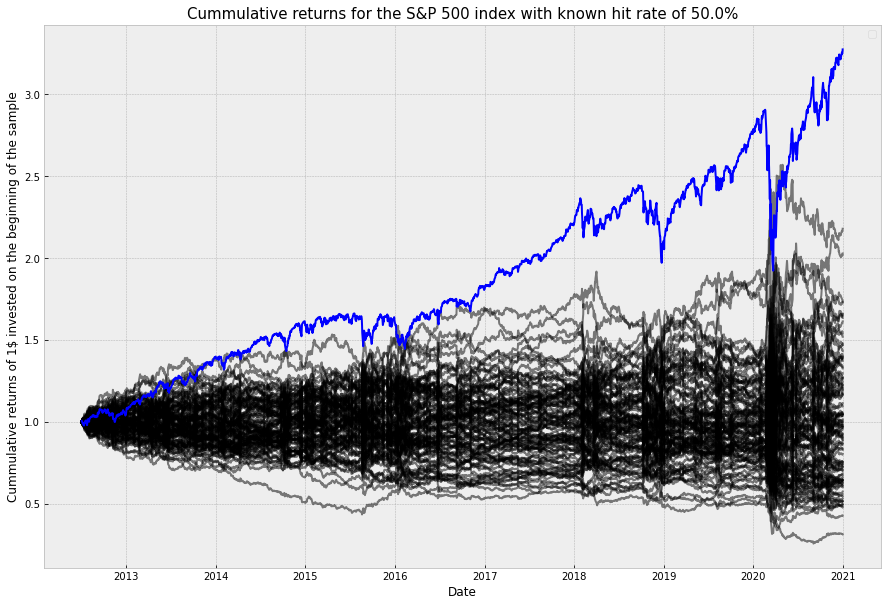

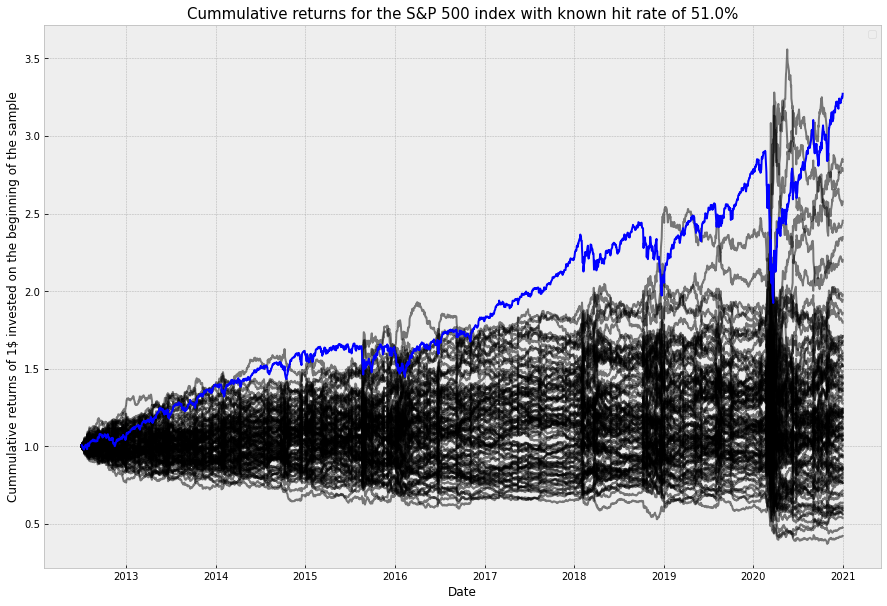

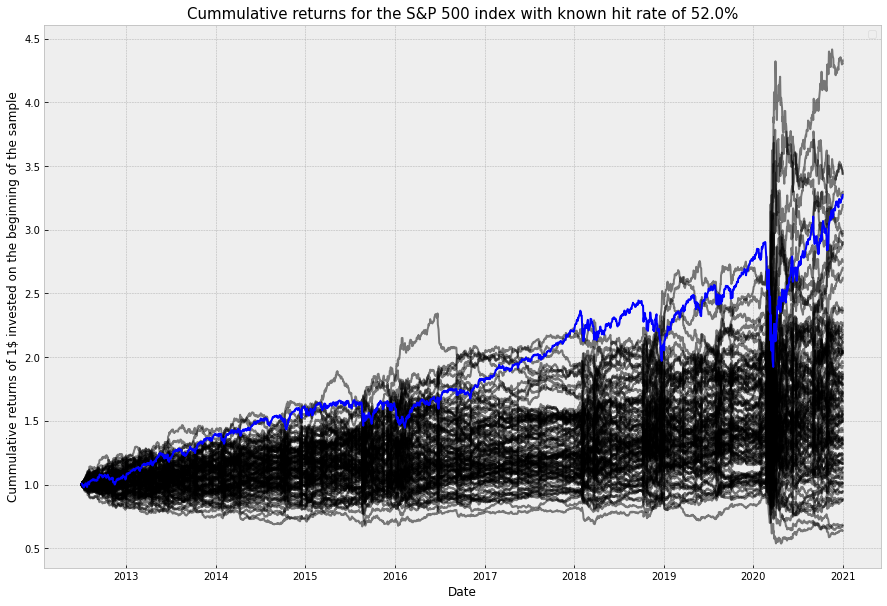

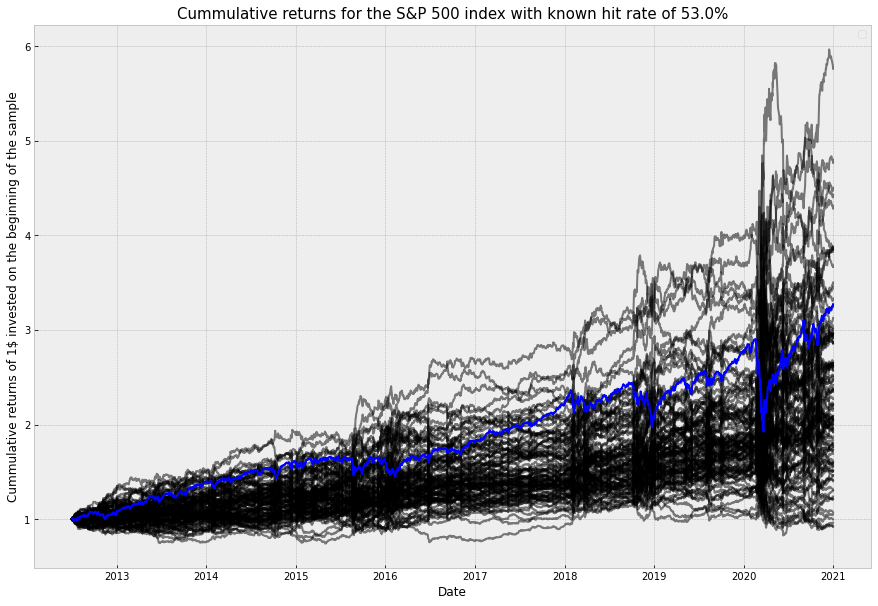

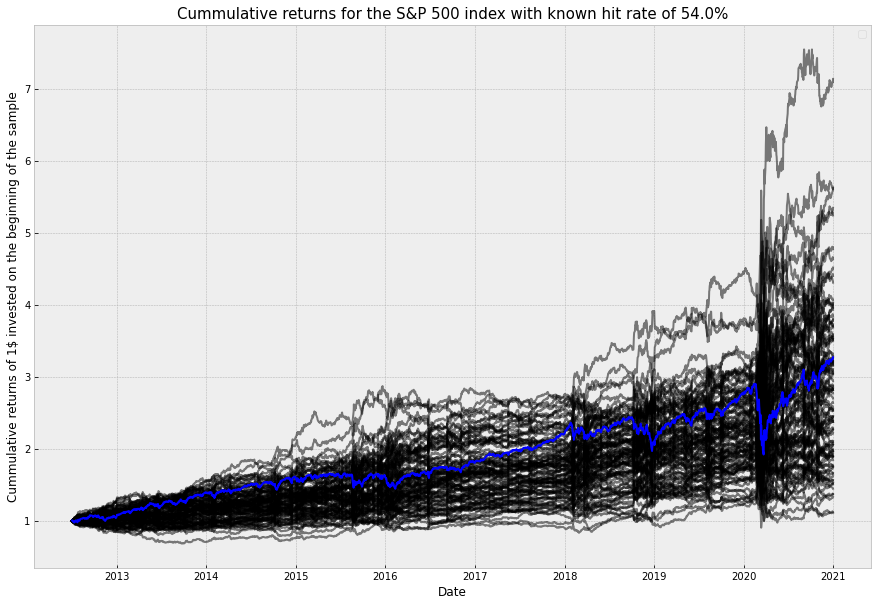

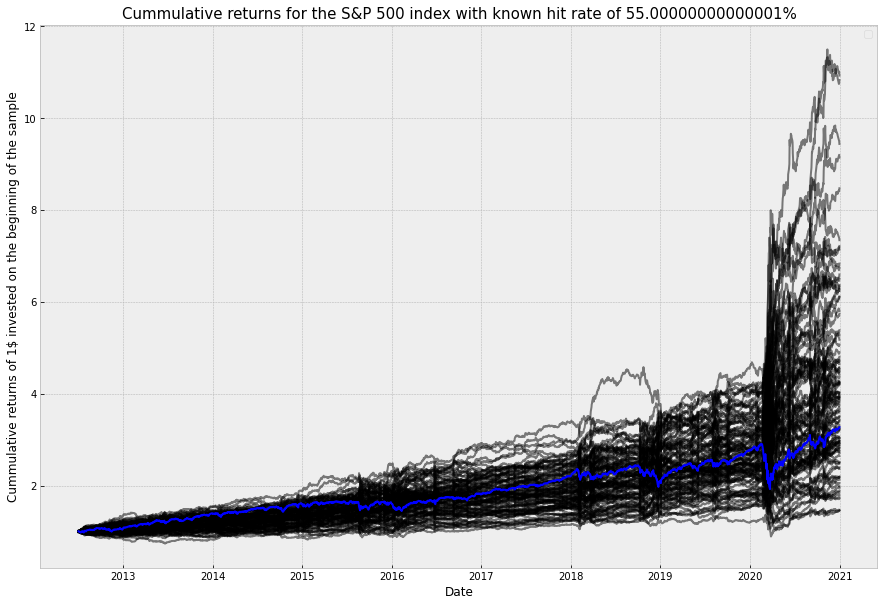

In [47]:
simu_num = 100
ps = [0.5, 0.51, 0.52, 0.53, 0.54, 0.55]

true_class_df = pivot_oos_spx_df.copy()
true_class_df.loc[true_class_df[true_class_df.columns[0]] > 0] = 1
true_class_df.loc[true_class_df[true_class_df.columns[0]] < 0] = -1

for p in ps:
    out_simu_list = []
    n = int(np.round(true_class_df.shape[0] * p))

    for i in range(0, simu_num+1):
        name = 'random' + str(i)
        sample_true_class_df = true_class_df.sample(n=n, replace=False)
        sample_true_class_df.rename(columns={sample_true_class_df.columns[0]: name}, inplace=True)
        simu_df = pd.concat([true_class_df, sample_true_class_df], axis=1)
        simu_df.loc[(pd.isna(simu_df[simu_df.columns[1]]))&(simu_df[simu_df.columns[0]] > 0), name] = -1
        simu_df.loc[(pd.isna(simu_df[simu_df.columns[1]]))&(simu_df[simu_df.columns[0]] < 0), name] = 1
        simu_df = simu_df[[name]]
        
        spx_simu_df = pd.DataFrame(simu_df.values * pivot_oos_spx_df.values,
                                  columns=['spx_random_pred' + str(i)])
        out_simu_list.append(spx_simu_df)
    out_simu_df = pd.concat(out_simu_list, axis=1)
    out_simu_df.index = pivot_oos_spx_df.index

    out_simu_df = pd.concat([out_simu_df, pivot_oos_spx_df], axis=1)
    out_simu_df = out_simu_df.reset_index()

    fig, ax = plt.subplots(figsize=(15, 10))
    ax.set_title('Cummulative returns for the S&P 500 index with known hit rate of ' + str(p*100) + '%',
                fontsize=15)

    for key in out_simu_df.columns:
        if key == 'date':
            continue

        if key == 'SPX Index':
            ax.plot(pd.to_datetime(out_simu_df['date']),
                    (1 + out_simu_df[key]/100).cumprod(),
                    color='blue')
        else:
             ax.plot(pd.to_datetime(out_simu_df['date']),
                    (1 + out_simu_df[key]/100).cumprod(),
                    color='black',
                    alpha=0.5)
    plt.xlabel("Date")
    plt.ylabel("Cummulative returns of 1$ invested on the beginning of the sample")
    plt.legend(loc='best', fontsize=10)    
    fig.savefig('img/' + 'known_hitrate' + str(np.round(p)) + '_spx_simulation.png')
plt.show()

In [48]:
simu_num = 1000
ps = [0.5, 0.51, 0.52, 0.53, 0.54, 0.55]

true_class_df = pivot_oos_spx_df.copy()
true_class_df.loc[true_class_df[true_class_df.columns[0]] > 0] = 1
true_class_df.loc[true_class_df[true_class_df.columns[0]] < 0] = -1

out_list = []
for p in ps:
    out_simu_list = []
    n = int(np.round(true_class_df.shape[0] * p))

    for i in range(0, simu_num+1):
        name = 'random' + str(i)
        sample_true_class_df = true_class_df.sample(n=n, replace=False)
        sample_true_class_df.rename(columns={sample_true_class_df.columns[0]: name}, inplace=True)
        simu_df = pd.concat([true_class_df, sample_true_class_df], axis=1)
        simu_df.loc[(pd.isna(simu_df[simu_df.columns[1]]))&(simu_df[simu_df.columns[0]] > 0), name] = -1
        simu_df.loc[(pd.isna(simu_df[simu_df.columns[1]]))&(simu_df[simu_df.columns[0]] < 0), name] = 1
        simu_df = simu_df[[name]]
        
        spx_simu_df = pd.DataFrame(simu_df.values * pivot_oos_spx_df.values,
                                  columns=['spx_random_pred' + str(i)])
        out_simu_list.append(spx_simu_df)
    out_simu_df = pd.concat(out_simu_list, axis=1)
    out_simu_df.index = pivot_oos_spx_df.index
    
    hist_simu = out_simu_df.mean() / out_simu_df.std() * np.sqrt(252)
    hist_simu = hist_simu.reset_index()
    hist_simu.rename(columns={hist_simu.columns[1]: 'value'}, inplace=True)
    hist_simu['auc'] = str(p)
    
    out_list.append(hist_simu)
out_simu_df = pd.concat(out_list, axis=0)
out_simu_df.rename(columns={'value': 'sharpe ratio'}, inplace=True)

### 1.3) Sharpe ratio distirbution for simulated strategies with fixed AUC

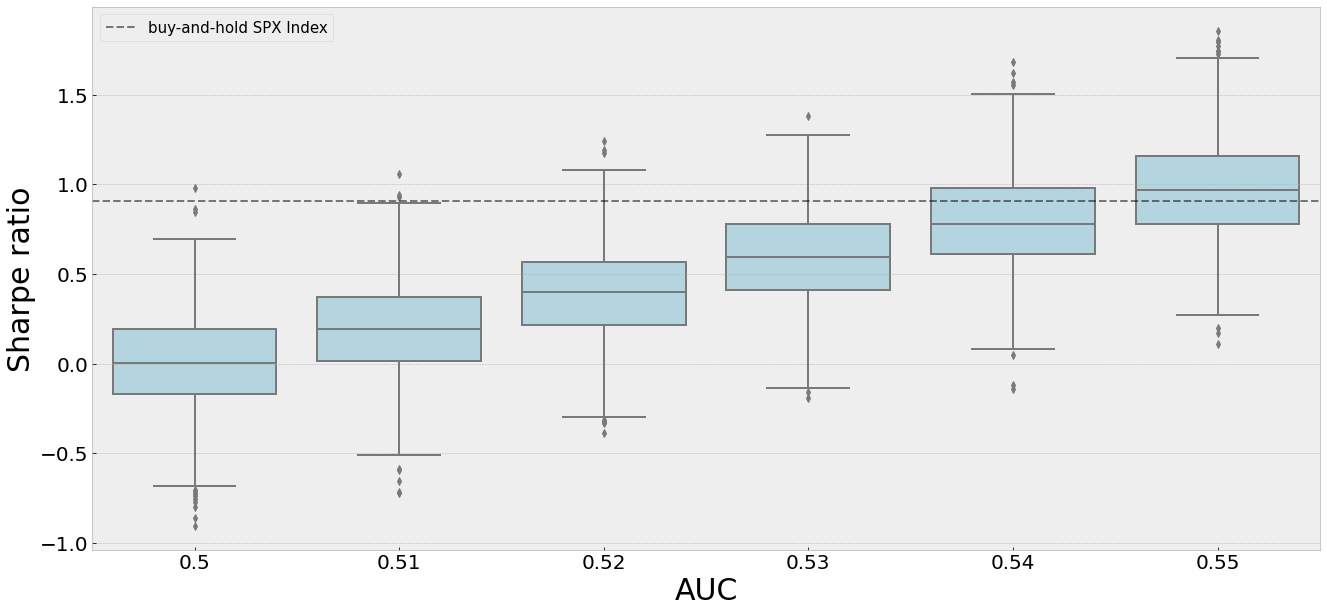

In [49]:
display(Markdown("### 1.3) Sharpe ratio distirbution for simulated strategies with fixed AUC"))

fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="auc", y='sharpe ratio',data=out_simu_df, ax=ax, color='lightblue');
ax.set_ylabel("Sharpe ratio", fontsize=30);
ax.set_xlabel("AUC", fontsize=30);
ax.axhline(y=0.91, color='k', linestyle='--', alpha=0.5, label="buy-and-hold SPX Index");
ax.tick_params(axis="x", labelsize=20);
ax.tick_params(axis="y", labelsize=20);
ax.legend(loc="best",fontsize=15);
fig.savefig('img/boxplot_simu_sr_known_auc.png')

In [ ]:
tot_time = time() - init
tot_time = tot_time / 60
print("notebook time = {:.3f} (minutes)".format(tot_time))